# Predictive Sales Analysis
This project aims to predict revenue based on historical sales data.
We will apply a complete data science pipeline, from data exploration to machine learning model tuning.

## Objective
To build a high-performance predictive model capable of forecasting revenue by product and point of sale, leveraging available features such as price, discounts, time periods, and more.

# Data Science Project
The goal of this project is to predict revenue from sales data.
This is a regression problem, meaning we will predict a quantitative variable.
My first approach is to create a simple linear regression model, and then test more complex models to improve performance.

### Dataset Structure
- **Number of rows and columns** : 200 rows, 8 columns.
- **Column names** : ['Product_ID', 'Category', 'Price', 'Units_Sold', 'Discount', 'Store_Location', 'Date_Sold', 'Revenue']

### Data Types
- **Product_ID** : Object
- **Category** : Object
- **Price** : Float
- **Units_Sold** : Integer
- **Discount** : Float
- **Store_Location** : Object
- **Date_Sold** : Object
- **Revenue** : Float

### Missing Values
- No missing values were detected in the dataset.

### General Statistics
- Mean, median, min, max, and standard deviation were calculated for the numerical columns (Price, Units_Sold, Discount, Revenue).

### Unique Values / Distribution
- Number of unique values per column:
    - **Category** : 4 unique values
    - **Store_Location** : 5 unique values
    The distribution of values is fairly balanced, without any dominant category or location.
### Inconsistent or Outlier Data
- Outlier analysis was performed using a distribution curve, which helped visualize and identify significant deviations between actual values and model predictions. This method revealed extreme values that could affect model performance, allowing us to decide whether to remove or adjust them.

### Feature Engineering
- **Date Transformation**: The sale date was transformed to extract relevant features such as year, month, and day of the week.
- **Ratio Creation**: Ratios like Revenue / Units_Sold were created to analyze the impact of price and discounts on revenue.
- **Categorization**: Variables like price and units sold were categorized to simplify analysis.
- **Categorical Encoding**: Categorical variables such as Category and Store_Location were encoded for use in machine learning models.

### Conclusion
The **Gradient Boosting** model demonstrated outstanding performance, with an R² of 0.957 and a low MSE, indicating strong predictive capability.

The most influential variables for revenue prediction are:

- **Income**: Customer income appears to be a key factor in sales forecasts.

- **Discount_rate**: The discount rate plays a major role in sales impact.

- **Price**: Product price strongly correlates with the quantity sold.

- **Units_Sold**: The number of units sold is also a strong profitability predictor.

- **Discount**: Applied discounts are another critical element in forecasting financial results.

These variables are crucial for understanding purchasing behavior and can be used to refine pricing and discount strategies.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Charger les données
df = pd.read_csv("sales_data.csv")  # Remplace par le vrai chemin si besoin
df.head()

,Product_ID,Category,Price,Units_Sold,Discount,Store_Location,Date_Sold,Revenue
0,P000,Home,20.56,96,0.04,Marseille,2024-01-01,1894.8096
1,P001,Toys,320.02,94,0.41,Marseille,2024-01-02,17748.3092
2,P002,Electronics,160.61,47,0.35,Paris,2024-01-03,4906.6355
3,P003,Home,256.74,99,0.04,Lille,2024-01-04,24400.5696
4,P004,Home,454.25,55,0.04,Nice,2024-01-05,23984.4000


In [2]:
df.shape

(200, 8)

In [3]:
df.columns

Index(['Product_ID', 'Category', 'Price', 'Units_Sold', 'Discount',
       'Store_Location', 'Date_Sold', 'Revenue'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Product_ID      200 non-null    object 
 1   Category        200 non-null    object 
 2   Price           200 non-null    float64
 3   Units_Sold      200 non-null    int64  
 4   Discount        200 non-null    float64
 5   Store_Location  200 non-null    object 
 6   Date_Sold       200 non-null    object 
 7   Revenue         200 non-null    float64
dtypes: float64(3), int64(1), object(4)
memory usage: 12.6+ KB


In [5]:
df.isna().sum()

Product_ID        0
Category          0
Price             0
Units_Sold        0
Discount          0
Store_Location    0
Date_Sold         0
Revenue           0
dtype: int64

In [6]:
df.describe()

,Price,Units_Sold,Discount,Revenue
count,200.000000,200.000000,200.000000,200.000000
mean,256.319600,50.145000,0.253750,9638.049739
std,144.885668,29.963864,0.152135,9058.556089
min,7.510000,1.000000,0.010000,13.370000
25%,127.742500,23.000000,0.110000,2742.015150
50%,262.655000,50.500000,0.255000,6364.712200
75%,383.037500,76.000000,0.390000,15888.722700
max,495.080000,99.000000,0.500000,41876.830800


In [7]:
df.select_dtypes(include='number').agg(['mean','median','min','max','std', 'skew', 'kurt'])

,Price,Units_Sold,Discount,Revenue
mean,256.319600,50.145000,0.253750,9638.049739
median,262.655000,50.500000,0.255000,6364.712200
min,7.510000,1.000000,0.010000,13.370000
max,495.080000,99.000000,0.500000,41876.830800
std,144.885668,29.963864,0.152135,9058.556089
skew,-0.052748,0.076697,-0.002139,1.286988
kurt,-1.253115,-1.306656,-1.261554,1.259669


In [8]:
df.select_dtypes(include='object')

,Product_ID,Category,Store_Location,Date_Sold
0,P000,Home,Marseille,2024-01-01
1,P001,Toys,Marseille,2024-01-02
2,P002,Electronics,Paris,2024-01-03
3,P003,Home,Lille,2024-01-04
4,P004,Home,Nice,2024-01-05
...,...,...,...,...
195,P195,Clothing,Nice,2024-07-14
196,P196,Clothing,Nice,2024-07-15
197,P197,Toys,Nice,2024-07-16
198,P198,Electronics,Lille,2024-07-17


In [9]:
df.select_dtypes(include='object').nunique()

Product_ID        200
Category            4
Store_Location      5
Date_Sold         200
dtype: int64

In [10]:
df.select_dtypes(include='number')

,Price,Units_Sold,Discount,Revenue
0,20.56,96,0.04,1894.8096
1,320.02,94,0.41,17748.3092
2,160.61,47,0.35,4906.6355
3,256.74,99,0.04,24400.5696
4,454.25,55,0.04,23984.4000
...,...,...,...,...
195,263.51,17,0.45,2463.8185
196,386.15,7,0.26,2000.2570
197,111.83,46,0.27,3755.2514
198,313.33,13,0.05,3869.6255


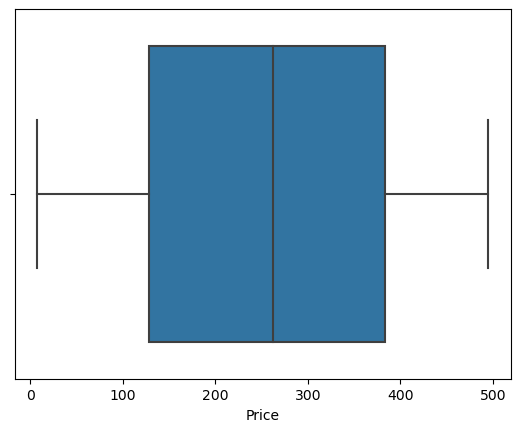

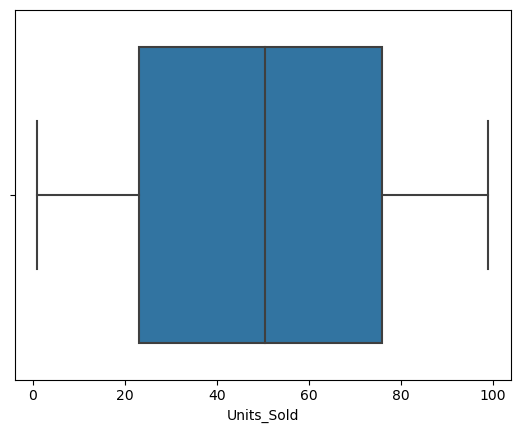

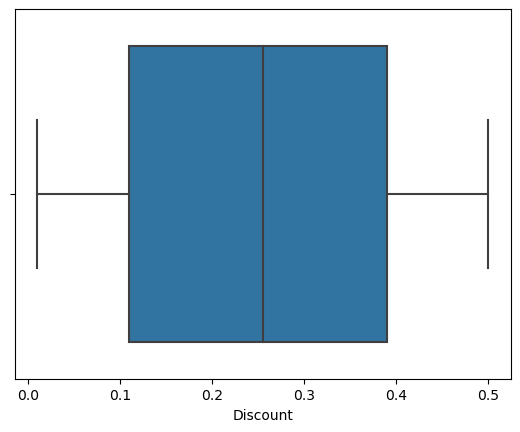

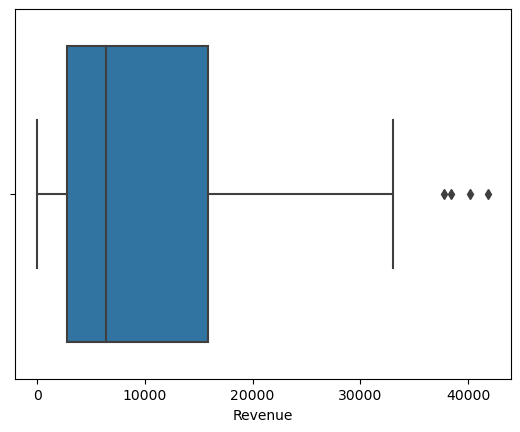

In [11]:
df_number=df.select_dtypes(include='number')
for i in df_number.columns:
    plt.figure()
    sns.boxplot(x=df_number[i])

In [12]:
df.head()

,Product_ID,Category,Price,Units_Sold,Discount,Store_Location,Date_Sold,Revenue
0,P000,Home,20.56,96,0.04,Marseille,2024-01-01,1894.8096
1,P001,Toys,320.02,94,0.41,Marseille,2024-01-02,17748.3092
2,P002,Electronics,160.61,47,0.35,Paris,2024-01-03,4906.6355
3,P003,Home,256.74,99,0.04,Lille,2024-01-04,24400.5696
4,P004,Home,454.25,55,0.04,Nice,2024-01-05,23984.4000


In [27]:
df['Date_Sold']=pd.to_datetime(df['Date_Sold'])
df['year'] = pd.DatetimeIndex(df['Date_Sold']).year
df['month'] = pd.DatetimeIndex(df['Date_Sold']).month
df['dayofweek'] = pd.DatetimeIndex(df['Date_Sold']).dayofweek
df.drop('Date_Sold', axis=1, inplace=True)
df.groupby(['year', 'month', 'dayofweek'])['Revenue'].sum().unstack().fillna(0)

dayofweek            0           1           2           3           4  \
year month                                                               
2024 1      28001.8057  57354.8708  23332.5179  37081.7729  62826.3296   
     2      42413.5685  74003.1040  38413.0376  25099.4480  50720.1235   
     3      22110.8058  17328.8687  24631.9047  22272.9656  19131.2041   
     4      60289.3330  30236.5475  60546.0269   9953.9441  10800.6552   
     5      62126.6696  46456.4782  74993.8834  44441.1398  35738.1723   
     6      48918.9688  27101.0487  47368.8084  72112.6737  47973.4510   
     7      24761.3410   4488.2438  30172.8892   5212.2708  18475.7847   

dayofweek            5           6  
year month                          
2024 1      47785.6074  54750.0348  
     2      39929.8036  40160.2986  
     3      55696.7872  25108.9889  
     4      67868.5460  63162.2850  
     5      63998.9622  13571.2727  
     6      78117.2943  38071.6983  
     7      20611.1700  11886.5413

In [14]:
df.head()

,Product_ID,Category,Price,Units_Sold,Discount,Store_Location,Date_Sold,Revenue,year,month,dayofweek
0,P000,Home,20.56,96,0.04,Marseille,2024-01-01,1894.8096,2024,1,0
1,P001,Toys,320.02,94,0.41,Marseille,2024-01-02,17748.3092,2024,1,1
2,P002,Electronics,160.61,47,0.35,Paris,2024-01-03,4906.6355,2024,1,2
3,P003,Home,256.74,99,0.04,Lille,2024-01-04,24400.5696,2024,1,3
4,P004,Home,454.25,55,0.04,Nice,2024-01-05,23984.4000,2024,1,4


In [15]:
df['dayofweek'].value_counts()

0    29
1    29
2    29
3    29
4    28
5    28
6    28
Name: dayofweek, dtype: int64

In [16]:
df['Discount_rate'] = df['Discount']/df['Price']
df['Price_per_unit'] = df['Price']/df['Units_Sold']
df['is_weekend'] = df['dayofweek'] >=5
df['Income'] = pd.cut(
    df['Revenue'],
    bins=[-float('inf'), 2742, 15888, float('inf')], #[Les résultats sont baasé sur les quartiles Q1 et Q3
    labels=[1, 2, 3] 
)

In [17]:
df.head()

,Product_ID,Category,Price,Units_Sold,Discount,Store_Location,Date_Sold,Revenue,year,month,dayofweek,Discount_rate,Price_per_unit,is_weekend,Income
0,P000,Home,20.56,96,0.04,Marseille,2024-01-01,1894.8096,2024,1,0,0.001946,0.214167,False,1
1,P001,Toys,320.02,94,0.41,Marseille,2024-01-02,17748.3092,2024,1,1,0.001281,3.404468,False,3
2,P002,Electronics,160.61,47,0.35,Paris,2024-01-03,4906.6355,2024,1,2,0.002179,3.417234,False,2
3,P003,Home,256.74,99,0.04,Lille,2024-01-04,24400.5696,2024,1,3,0.000156,2.593333,False,3
4,P004,Home,454.25,55,0.04,Nice,2024-01-05,23984.4000,2024,1,4,0.000088,8.259091,False,3


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Product_ID      200 non-null    object        
 1   Category        200 non-null    object        
 2   Price           200 non-null    float64       
 3   Units_Sold      200 non-null    int64         
 4   Discount        200 non-null    float64       
 5   Store_Location  200 non-null    object        
 6   Date_Sold       200 non-null    datetime64[ns]
 7   Revenue         200 non-null    float64       
 8   year            200 non-null    int64         
 9   month           200 non-null    int64         
 10  dayofweek       200 non-null    int64         
 11  Discount_rate   200 non-null    float64       
 12  Price_per_unit  200 non-null    float64       
 13  is_weekend      200 non-null    bool          
 14  Income          200 non-null    category      
dtypes: boo

In [24]:
df.head()

,Price,Units_Sold,Discount,Date_Sold,Revenue,year,month,dayofweek,Discount_rate,Price_per_unit,...,Income,Category_Clothing,Category_Electronics,Category_Home,Category_Toys,Store_Location_Lille,Store_Location_Lyon,Store_Location_Marseille,Store_Location_Nice,Store_Location_Paris
0,20.56,96,0.04,2024-01-01,1894.8096,2024,1,0,0.001946,0.214167,...,1,0,0,1,0,0,0,1,0,0
1,320.02,94,0.41,2024-01-02,17748.3092,2024,1,1,0.001281,3.404468,...,3,0,0,0,1,0,0,1,0,0
2,160.61,47,0.35,2024-01-03,4906.6355,2024,1,2,0.002179,3.417234,...,2,0,1,0,0,0,0,0,0,1
3,256.74,99,0.04,2024-01-04,24400.5696,2024,1,3,0.000156,2.593333,...,3,0,0,1,0,1,0,0,0,0
4,454.25,55,0.04,2024-01-05,23984.4000,2024,1,4,0.000088,8.259091,...,3,0,0,1,0,0,0,0,1,0


In [28]:
from sklearn.model_selection import train_test_split

# Définir les features (X) et la target (y)
X = df.drop(['Revenue'], axis=1)  # Toutes les colonnes sauf 'Revenue'
y = df['Revenue']  # Cible : 'Revenue'

# Séparation en train et test (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Créer le modèle
model = LinearRegression()

# Entraîner le modèle
model.fit(X_train, y_train)

# Prédictions sur le jeu de test
y_pred = model.predict(X_test)

# Évaluation du modèle
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')

Mean Squared Error: 17523496.495854102
R² Score: 0.8108515936948695


In [30]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

models = {
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'{name} - MSE: {mse:.2f}, R²: {r2:.4f}')

Decision Tree - MSE: 15129253.61, R²: 0.8367
Random Forest - MSE: 6433966.08, R²: 0.9306
Gradient Boosting - MSE: 3972001.15, R²: 0.9571


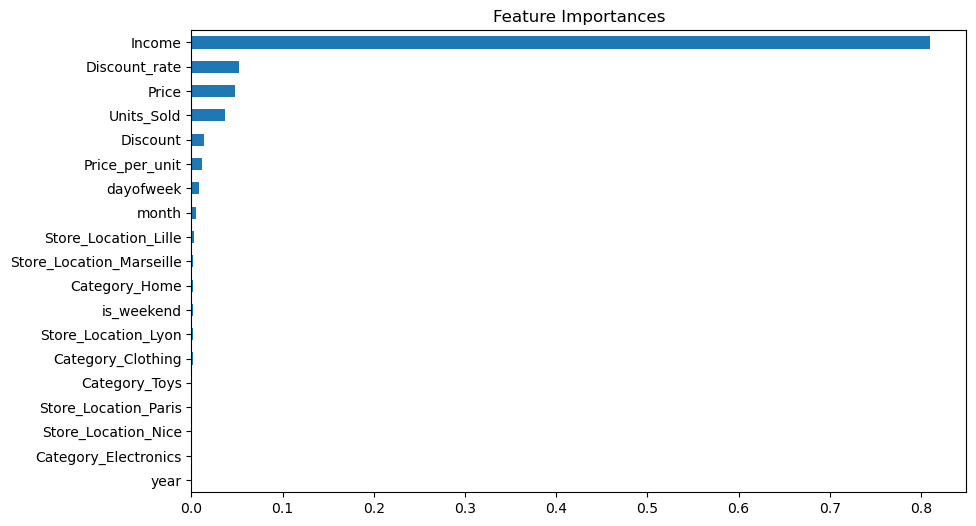

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
importances = pd.Series(rf.feature_importances_, index=X_train.columns)
importances.sort_values().plot(kind='barh', figsize=(10,6), title="Feature Importances")
plt.show()

Le gradient boosting est le modèle que je vais choisir  
Top 5 des features : Income, Discount_rate, Price, Units_Sold, Discount

In [36]:
scores

array([0.94507216, 0.96894301, 0.92198209, 0.87387945, 0.89725712])

In [37]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.92 accuracy with a standard deviation of 0.03


### Conclusion

The **Gradient Boosting** model demonstrated exceptional performance, achieving an **R² score of 0.957** and a low MSE, indicating a strong predictive capability.

The most influential variables in revenue prediction were:

- **Income**: Customer income appears to be a key factor in sales forecasting.  
- **Discount_rate**: The discount rate plays a major role in influencing sales.  
- **Price**: Product price has a significant correlation with the quantity sold.  
- **Units_Sold**: The number of units sold is also a strong predictor of profitability.  
- **Discount**: The applied discount is another key element in predicting financial outcomes.  

These variables are crucial for understanding customer purchasing behavior and can be leveraged to refine pricing and discount strategies.
